# OutCoef Analysis

An example notebook to look at coefficient outputs.

In [1]:
# standard python modules
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline
import time
import scipy.interpolate as interpolate


In [2]:
# exptool classes
from exptool.io import outcoef
from exptool.utils import style


import exptool
import pkg_resources



First, give ourselves access to the default files, which ship with exptool.

In [3]:
cyl_coef_file = pkg_resources.resource_filename('exptool', 'tests/outcoef.star.run0.dat')
sph_coef_file = pkg_resources.resource_filename('exptool', 'tests/outcoef.dark.run0.dat')

The first file we will read in are the coefficients for a cylindrical component. The output follows a specific format, listed in the documentation:

In [4]:
O1 = outcoef.OutCoef(cyl_coef_file)
print(O1.read_binary_eof_coefficients.__doc__)


OutCoef: reading Cylinder coefficients . . .

        read_binary_eof_coefficients
        definitions to read EXP-generated binary coefficient files (generated by EmpOrth9thd.cc dump_coefs)
        the file is self-describing, so no other items need to be supplied.

        inputs
        ----------------------
        coeffile   : input coefficient file to be parsed

        returns
        ----------------------
        times      : vector, time values for which coefficients are sampled
        coef_array : (rank 4 matrix)
                 0: times
                 1: cos/0, sin/1 (note all m=0 sine terms are 0)
                 2: azimuthal order
                 3: radial order

        


Similarly for a spherical component, we can read in and check the documentation for what each dimension means.

In [5]:
O2 = outcoef.OutCoef(sph_coef_file)
print(O2.read_binary_sl_coefficients.__doc__)


OutCoef: reading SphereSL coefficients . . .

        read_binary_sl_coefficients
        definitions to read EXP-generated binary coefficient files (generated by SphericalBasis.cc dump_coefs)
        the file is self-describing, so no other items need to be
        supplied.

        this is for NEW yaml coefficients

        inputs
        ----------------------
        coeffile   : input coefficient file to be parsed

        returns
        ----------------------
        times      : vector, time values for which coefficients are sampled
        coef_array : (rank 3 matrix)
                      0: times
                      1: azimuthal (L) order (unrolled, so l, then m (first cos, then sin)
                      2: radial order

        


The default output will depend on the geometry of the component. Let's compare the lowest-order function for each:

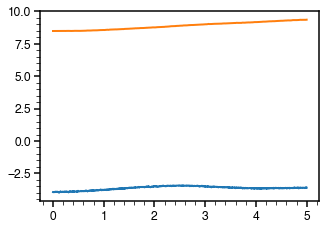

In [6]:
plt.plot(O1.T,O1.coefs[:,0,0,0])
plt.plot(O2.T,O2.coefs[:,0,0])

There is also a hidden set of definitions that will repackage the coefficients in a more dictionary-oriented package for clearer organisation.

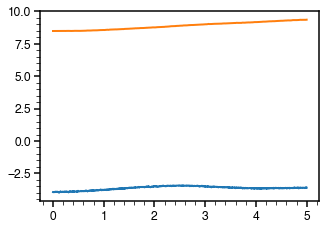

In [7]:
O1._repackage_cylindrical_coefficients()
O2._repackage_spherical_coefficients()

l = 0
m = 0
n = 0
p = 'cos'

plt.plot(O1.T,O1.C[m][p][n])
plt.plot(O2.T,O2.C[l][m][p][n])

And the corresponding documentation...

In [8]:
print(O1._repackage_cylindrical_coefficients.__doc__)
print(O2._repackage_spherical_coefficients.__doc__)


        redefine the dictionary of cylindrical coefficients to be more interpretable, by sorting on

        -m order
        -cos/sin
        -n order
        -time

        this formulation has the advantage of being more straightforward to read:

        e.g. to plot the lowest-order cosine function, one could:
        plt.plot(self.T,self.C[0]['cos'][0])

        

        redefine the dictionary of spherical coefficients to be more interpretable, by sorting on

        -l order
        -morder
        -cos/sin
        -n order
        -time

        this formulation has the advantage of being more straightforward to read and following spherical harmonic conventions

        e.g. to plot the lowest-order cosine function, one could:
        l = 1
        m = 1
        p = 'cos'
        n = 0
        
        plt.plot(self.T,self.C[l][m][p][n])

        
